Data has been compiled into the data_cleaned2.csv file, where missing values are represented with None.

In [1]:
# exploring duplicate data
import csv
from collections import defaultdict

duplicates = defaultdict(int)
duplicate_count = 0
unique = 0
total = 0
recipes = set()

with open('data_cleaned2.csv', 'r') as readfile:
    reader = csv.reader(readfile, delimiter = '\t')
    
    for line in readfile:
        data_mapped = line.strip().split('\t')
        total += 1
        recipe = data_mapped[1] + data_mapped[2]
        
        if recipe in recipes:
            duplicate_count += 1
            duplicates[recipe] += 1
            continue
        else:
            unique += 1
            recipes.add(recipe)

print "duplicates: " + str(duplicate_count)	
print "unique: " + str(unique)
print "total: " + str(total)
    
    

duplicates: 133574
unique: 84304
total: 217878


In [2]:
for d in duplicates:
    print d + '\t' + str(duplicates[d])
print " "
print len(duplicates)

Easy Cinnamon FudgeMcCormick® & Company	1
Basic Balsamic Flank SteakRodale	1
Orange and Onion SaladChristine L.	1
Alyson's Broccoli SaladJJOHN32	1
German Christmas GingerbreadCarol	1
Pumpkin Spice RingSharon	1
Dee's Hot Milk Sponge CakeJoan Donahue	1
Grilled Sirloin SaladEatingWell	1
Candied Sweet PotatoesBrenda	1
Tracy's Make-Ahead  Mashed PotatoesKraft Kitchens	1
Crunchy Caramel Snack MixWerther's Original®	1
Pumpkin Crunch CakeNora LaCroix	1
Cranberry Salad IIJackie	1
Chive and Onion Mashed PotatoesKraft Kitchens	1
Carrot Fruit RingCarol	1
Zucchini Casserole IIBea Gassman	1
Crunchy Ice Cream SandwichesKellogg's® Rice Krispies®	1
Plum Breadv monte	1
Classic Minute® Rice PuddingMinute® Rice	1
Thanksgiving MeatloafMichelle Barr	1
Cinnamon Swirl CoffeecakeMaker of SPLENDA® Sweetener Products	1
Grilled Turkey Cuban SandwichesButterball®	1
Apple-Pecan Chicken SlawSafeway	1
Baked Sweet Potatoes with Ginger and HoneyChristine L.	1
Minnehaha CakeSuzanne Stull	1
Sugarless Pumpkin PieConnie He

In [3]:
for d in duplicates:
    if duplicates[d] > 1:
        print d + '\t' + str(duplicates[d])

Arkansas SinMistyR	2
Johnsonville® Three Cheese Italian Style Chicken Sausage Skillet PizzaThe Kitchen at Johnsonville Sausage	133294


Of 133,574 total repeat entries, 133,294 of them are the Johnsonvile recipe. The Arkansas Sin recipe is repeated twice, and the rest of the duplicates occur just once. 280 recipes total occur more than once.  
Let's look at this Johnsonville recipe a bit closer:

In [4]:
import pandas as pd
import numpy as np

data = pd.read_csv('data_cleaned2.csv', delimiter = '\t')

print data.shape  
print data.head(5)

(217877, 11)
   recipe_index                                              title  \
0          6663                               Crispy Cheese Twists   
1          6664  Basil, Roasted Peppers and Monterey Jack Cornb...   
2          6665                                  Mom's Yeast Rolls   
3          6666                               Sweet Potato Bread I   
4          6667                                     Cornish Splits   

          author  rating  rating_count  review_count ready_in_time  \
0      Stephanie    4.17          66.0            43           NaN   
1      Stephanie    4.32          57.0            46      1 h 40 m   
2          Kathy    3.69         186.0           165           NaN   
3  Mary E. Crain    4.70         407.0           327           NaN   
4  Linda Jackman    4.33         108.0            88           NaN   

  calorie_count                                         descriptio  \
0           121  """""""These are great as an appetizer or serv...   
1    

In [5]:
def make_numeric(i):
    try:
        return int(i)
    except:
        return "NaN"

data.calorie_count = data.calorie_count.apply(make_numeric)

In [6]:
print list(data.columns.values)


['recipe_index', 'title', 'author', 'rating', 'rating_count', 'review_count', 'ready_in_time', 'calorie_count', 'descriptio', 'ingredients', 'directions']


In [7]:
# remove most duplicates
# some will still exist, but this gets rid of most of the Johnsonville recipes, which presents the main issue
data = data.drop_duplicates(subset = ['title', 'author', 'rating', 'rating_count', 'review_count', 'ready_in_time', 
                                      'calorie_count', 'descriptio', 'ingredients', 'directions'])
 
print data.shape

(84584, 11)


In [8]:
# convert ready_in_time column to numeric value in minutes
# existing format is %d %h %m

import re

d = re.compile('\d+ d')
h = re.compile('\d+ h')
m = re.compile('\d+ m')

def fix_time(i):
    i = str(i)
    time = 0
    days = d.search(i)
    hours = h.search(i)
    minutes = m.search(i)
    if days:
        time += int(days.group().split()[0])*60*24
    if hours:
        time += int(hours.group().split()[0])*60
    if minutes:
        time += int(minutes.group().split()[0])
    if time == 0:
        return "NaN"
    else:
        return time

data['ready_in_time'] = data['ready_in_time'].apply(fix_time)

print data['ready_in_time'].head(5)

0    NaN
1    100
2    NaN
3    NaN
4    NaN
Name: ready_in_time, dtype: object


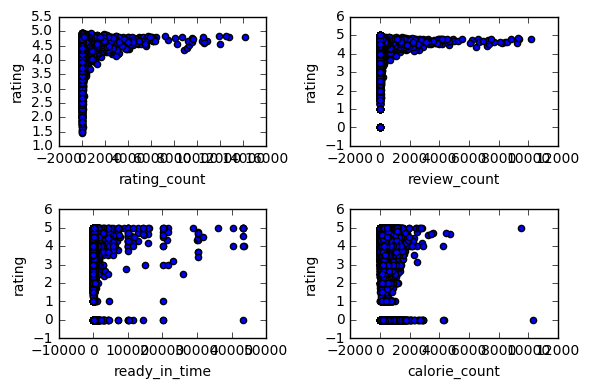

In [9]:
import matplotlib.pyplot as plt

x1 = data.rating_count
x2 = data.review_count
x3 = data.ready_in_time
x4 = data.calorie_count
y = data.rating

plt.subplot(221)
plt.scatter(x1, y)
plt.xlabel('rating_count')
plt.ylabel('rating')

plt.subplot(222)
plt.scatter(x2, y)
plt.xlabel('review_count')
plt.ylabel('rating')

plt.subplot(223)
plt.scatter(x3, y)
plt.xlabel('ready_in_time')
plt.ylabel('rating')

plt.subplot(224)
plt.scatter(x4, y)
plt.xlabel('calorie_count')
plt.ylabel('rating')

plt.tight_layout()
plt.show()

Only highly rated recipes get a lot of ratings and reviews. This is not surprising - users are unlikely to try a recipe with a low rating. For cook time and calorie count, a similiar trend is present, but not as strong. 

In [10]:
# add fields for length (# of characters) in description and directions, and # of ingredients and steps

def field_length(f):
    return len(f)

data['description_length'] = data.descriptio.apply(field_length)
data['directions_length'] = data.directions.apply(field_length)

In [11]:
def make_list(i):
    i = i[2:-2]
    i = i.split("', '")
    return i

def count_items(i):
    return len(i)

data.ingredients = data.ingredients.apply(make_list)
data.directions = data.directions.apply(make_list)
data['ingredient_count'] = data.ingredients.apply(count_items)
data['directions_count'] = data.directions.apply(count_items)

print data.head(5)

   recipe_index                                              title  \
0          6663                               Crispy Cheese Twists   
1          6664  Basil, Roasted Peppers and Monterey Jack Cornb...   
2          6665                                  Mom's Yeast Rolls   
3          6666                               Sweet Potato Bread I   
4          6667                                     Cornish Splits   

          author  rating  rating_count  review_count ready_in_time  \
0      Stephanie    4.17          66.0            43           NaN   
1      Stephanie    4.32          57.0            46           100   
2          Kathy    3.69         186.0           165           NaN   
3  Mary E. Crain    4.70         407.0           327           NaN   
4  Linda Jackman    4.33         108.0            88           NaN   

  calorie_count                                         descriptio  \
0           121  """""""These are great as an appetizer or serv...   
1           314  "

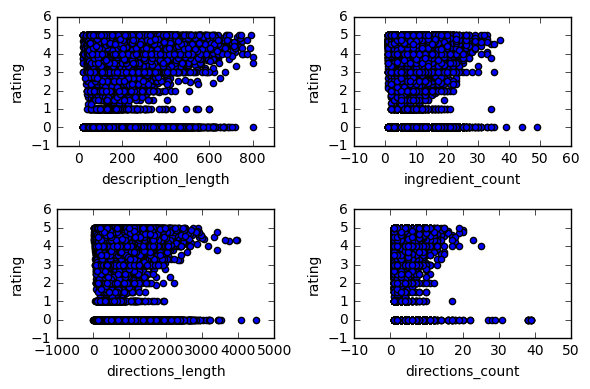

In [12]:
x1 = data.description_length
x2 = data.ingredient_count
x3 = data.directions_length
x4 = data.directions_count
y = data.rating

plt.subplot(221)
plt.scatter(x1, y)
plt.xlabel('description_length')
plt.ylabel('rating')

plt.subplot(222)
plt.scatter(x2, y)
plt.xlabel('ingredient_count')
plt.ylabel('rating')

plt.subplot(223)
plt.scatter(x3, y)
plt.xlabel('directions_length')
plt.ylabel('rating')

plt.subplot(224)
plt.scatter(x4, y)
plt.xlabel('directions_count')
plt.ylabel('rating')

plt.tight_layout()
plt.show()

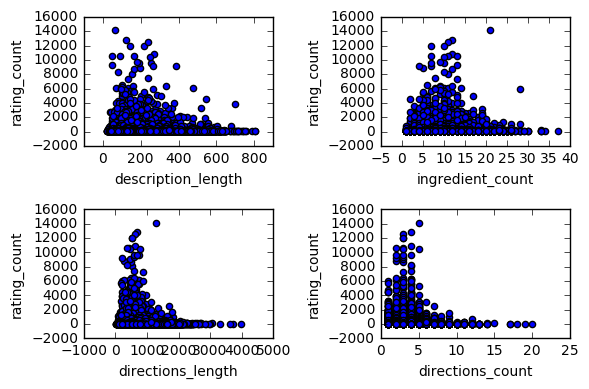

In [13]:
x1 = data.description_length
x2 = data.ingredient_count
x3 = data.directions_length
x4 = data.directions_count
y = data.rating_count

plt.subplot(221)
plt.scatter(x1, y)
plt.xlabel('description_length')
plt.ylabel('rating_count')

plt.subplot(222)
plt.scatter(x2, y)
plt.xlabel('ingredient_count')
plt.ylabel('rating_count')

plt.subplot(223)
plt.scatter(x3, y)
plt.xlabel('directions_length')
plt.ylabel('rating_count')

plt.subplot(224)
plt.scatter(x4, y)
plt.xlabel('directions_count')
plt.ylabel('rating_count')

plt.tight_layout()
plt.show()

The rating does not seem to depend on the complexity of the recipe, however the number of users who rate it does. Recipes with long or complex directions, or many ingredients get many fewer reviews than shorter recipes.

In [14]:
x = data.rating_count

plt.histogram(x)

plt.show()

AttributeError: 'module' object has no attribute 'histogram'